In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
#data
mnist = input_data.read_data_sets("MNIST-data", one_hot=False)
x_, y_ = mnist.train.next_batch(60000)
x_test,y_test = mnist.test.next_batch(10000)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
#for binary classifier extract samples of 2 classes
def dataset(label1,label2):
    Y = []
    X = []
    for e in range(60000):
        if y_[e]==label1:
            Y.append(0)
            X.append(x_[e])
        elif y_[e]==label2:
            Y.append(1)
            X.append(x_[e])
    X = np.asarray(X)
    Y = np.asarray(Y)


    test_Y = []
    test_X = []
    for e in range(10000):
        if y_test[e]==label1:
            test_Y.append(0)
            test_X.append(x_test[e])
        elif y_test[e]==label2:
            test_Y.append(1)
            test_X.append(x_test[e])
    test_X = np.asarray(test_X)
    test_Y = np.asarray(test_Y)
    
    return X,Y,test_X,test_Y

In [4]:
def pixel_dist(p,t):
    return (np.sqrt((np.square(np.subtract(p,t))).sum()))/28

def plot(samples,labels):
    w=10
    h=10
    fig=plt.figure(figsize=(2, 2))
    columns = 2
    rows = 1
    for i in range(1, columns*rows +1):
        sample = samples[i-1]
        fig.add_subplot(rows, columns, i)
        plt.title(str([labels[i-1]]))
        plt.imshow(sample.reshape(28,28), cmap='Greys_r')
    plt.show()

def accuracy(labels,test_Y,test_X):
    incorrect = []
    incorrect_Y = []
    acc = 0
    for t,r in enumerate(labels):
        if r==test_Y[t]:
            acc = acc+1
        else:
            incorrect.append(test_X[t])
            incorrect_Y.append(r)
            
    return incorrect, incorrect_Y,acc/len(labels)

In [5]:
def train(K,label1,label2):
    #setup data
    X,Y,test_X,test_Y = dataset(label1,label2)
    
    labels = []
    px_d = np.ones(len(X))
    for k,e in enumerate(test_X):
        if k%100==0:
            print("Testing on ",k,"sample")
        #distance with each point in train set
        for j in range(len(X)):
            px_d[j] = pixel_dist(e,X[j])
        px_ds = np.argsort(px_d)
        count1 = 0
        for i in range(K):
            count1 = count1+Y[px_ds[i]]
        if count1>=(K-count1):
            labels.append(1)
        else:
            labels.append(0)

    return np.asarray(labels),test_Y,test_X

In [6]:
labels,test_Y,test_X = train(5,0,1)
incorrect_m,incorrect_my,acc_m = accuracy(labels,test_Y,test_X)
print("My KNN accuracy =",acc_m)

X,Y,test_X,test_Y = dataset(0,1)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, Y)
sk_labels = neigh.predict(test_X)
_,__,acc_s = accuracy(sk_labels,test_Y,test_X)
print("Sklearn KNN accuracy =",acc_s)

Testing on  0 sample
Testing on  100 sample
Testing on  200 sample
Testing on  300 sample
Testing on  400 sample
Testing on  500 sample
Testing on  600 sample
Testing on  700 sample
Testing on  800 sample
Testing on  900 sample
Testing on  1000 sample
Testing on  1100 sample
Testing on  1200 sample
Testing on  1300 sample
Testing on  1400 sample
Testing on  1500 sample
Testing on  1600 sample
Testing on  1700 sample
Testing on  1800 sample
Testing on  1900 sample
Testing on  2000 sample
Testing on  2100 sample
My KNN accuracy = 0.9990543735224586
Sklearn KNN accuracy = 0.9990543735224586


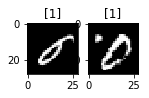

In [7]:
#show incorrect ones
plot(incorrect_m,incorrect_my)

# Some thoughts:
We See that the KNN algorithm works very well on MNIST images with the pixels as the features above. This performance is very much related to the fact that a 0 and a 1 look very different and thus pixels as features can very much be used directly to classify. 
Let's take the case of images of 3 and 8, in this case the images are very similar and thus hard to distinguish without the spatial information. Using the pixels as the features in this case will lead to lower accuracy than above (0,1).

Edit: We can improve the classifier by playing with the number of neighbours. Too few neighbours leads to model being highly biased but too many also leads to model being highly variational(overfitting). We can reach a good choice of K(hyperparameter) using l-fold cross validation and grid search to find optimum values of l and K. I will be implementing grid search in the next few experiments.

In [8]:
labels,test_Y,test_X = train(5,3,8)
incorrect_m,incorrect_my,acc_m = accuracy(labels,test_Y,test_X)
print("My KNN accuracy =",acc_m)

X,Y,test_X,test_Y = dataset(3,8)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, Y)
sk_labels = neigh.predict(test_X)
_,__,acc_s = accuracy(sk_labels,test_Y,test_X)
print("Sklearn KNN accuracy =",acc_s)

Testing on  0 sample
Testing on  100 sample
Testing on  200 sample
Testing on  300 sample
Testing on  400 sample
Testing on  500 sample
Testing on  600 sample
Testing on  700 sample
Testing on  800 sample
Testing on  900 sample
Testing on  1000 sample
Testing on  1100 sample
Testing on  1200 sample
Testing on  1300 sample
Testing on  1400 sample
Testing on  1500 sample
Testing on  1600 sample
Testing on  1700 sample
Testing on  1800 sample
Testing on  1900 sample
My KNN accuracy = 0.9879032258064516
Sklearn KNN accuracy = 0.9879032258064516


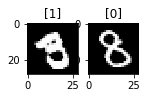

In [9]:
#show incorrect ones
plot(incorrect_m,incorrect_my)